In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensor

SyntaxError: invalid syntax (69938190.py, line 4)

In [1]:
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
#import pandasas pd
import numpy as np
import os 
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop


#Arquivo com as imagens para treino encontra-se em uma pasta em formado de arquivo zip
#arquivo_zip = '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/Intel_Image_Classification.zip'

#necessário extrair as pastas de dentro do arquivo zip
#zip_ = zipfile.ZipFile(arquivo_zip, 'r')
#zip_.extractall('/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/')
#zip_.close()

2022-11-26 12:16:38.206044: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 12:16:38.206069: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
diretorio = '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/'

#diretorios
diretorio_train = os.path.join(diretorio, 'seg_train/seg_train')
diretorio_validation = os.path.join(diretorio, 'seg_test/seg_test')


dicio_train = {}
dicio_validation = {}

all_subdir = os.listdir(diretorio_train)

for subdir in all_subdir:
    dicio_train['seg_train' + '_' + subdir] = os.path.join(diretorio_train, subdir)

for subdir in all_subdir:
    dicio_validation['seg_test' + '_' + subdir] = os.path.join(diretorio_validation, subdir)

Dentro de cada diretório há 6 subdiretórios nomeados com o tipo de cada respectiva foto a ser idetificada 

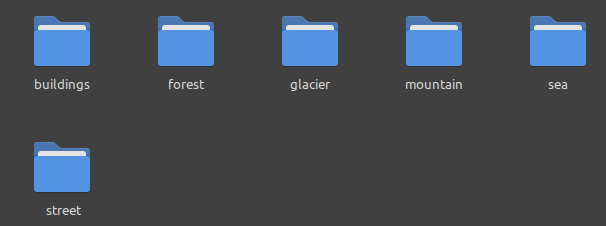

Os 6 tipos de outputs que temos são:
* 1) street - ruas 
* 2) buildings - edificios
* 3) forest - florestas
* 4) glacier - gelo
* 5) mountain - montanhas
* 6) sea - mar

In [4]:
print('QUANTIDADE DE IMAGENS POR CLASSE - TRAIN')
for subdir in dicio_train.keys():
    print(subdir, '=' , len(os.listdir(dicio_train[subdir])))

print('\n')
print('QUANTIDADE DE IMAGENS POR CLASSE - VALIDATION')    
for subdir in dicio_validation.keys():
    print(subdir, '=' , len(os.listdir(dicio_validation[subdir])))

QUANTIDADE DE IMAGENS POR CLASSE - TRAIN
seg_train_street = 2382
seg_train_sea = 2274
seg_train_glacier = 2404
seg_train_forest = 2271
seg_train_mountain = 2512
seg_train_buildings = 2191


QUANTIDADE DE IMAGENS POR CLASSE - VALIDATION
seg_test_street = 501
seg_test_sea = 510
seg_test_glacier = 553
seg_test_forest = 474
seg_test_mountain = 525
seg_test_buildings = 437


digite qual foto subdir deseja ver (street, sea, glacier, forest, mountain, buldings): mountain
digite um indice:1


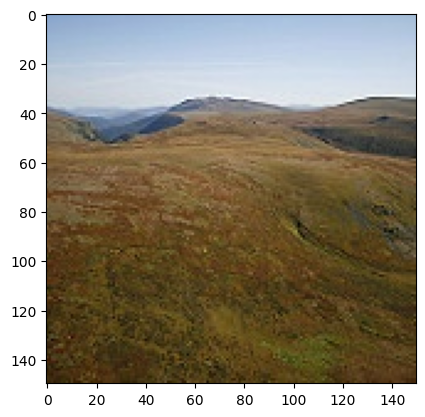

In [7]:
tipo = str(input('digite qual foto subdir deseja ver (street, sea, glacier, forest, mountain, buldings): '))

indice = int(input('digite um indice:')) 

fotos = os.listdir(dicio_train['seg_train_' + tipo])

caminho_foto = os.path.join(dicio_train['seg_train_' + tipo], fotos[indice])

img = load_img(caminho_foto, target_size = (150,150))
img_array = img_to_array(img)

img_array = img_array / 255.0

plt.imshow(img_array)

## **TensorFlow**

In [22]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0, 
                                  rotation_range = 5,
                                  zoom_range = 0.15)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [23]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 12,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

/tmp/ipykernel_15574/1055435833.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 12,


Epoch 1/12
219/219 [==============================] - 136s 617ms/step - loss: 1.2825 - accuracy: 0.5062 - val_loss: 0.9564 - val_accuracy: 0.6579
Epoch 2/12
219/219 [==============================] - 135s 614ms/step - loss: 0.9425 - accuracy: 0.6450 - val_loss: 0.9193 - val_accuracy: 0.6600
Epoch 3/12
219/219 [==============================] - 134s 611ms/step - loss: 0.8408 - accuracy: 0.6911 - val_loss: 0.8567 - val_accuracy: 0.6821
Epoch 4/12
219/219 [==============================] - 137s 626ms/step - loss: 0.7630 - accuracy: 0.7218 - val_loss: 0.7972 - val_accuracy: 0.7177
Epoch 5/12
219/219 [==============================] - 134s 611ms/step - loss: 0.7124 - accuracy: 0.7370 - val_loss: 0.7125 - val_accuracy: 0.7442
Epoch 6/12
219/219 [==============================] - 134s 610ms/step - loss: 0.6653 - accuracy: 0.7620 - val_loss: 0.9203 - val_accuracy: 0.6756
Epoch 7/12
219/219 [==============================] - 134s 611ms/step - loss: 0.6297 - accuracy: 0.7739 - val_loss: 0.7133 -

<AxesSubplot: >

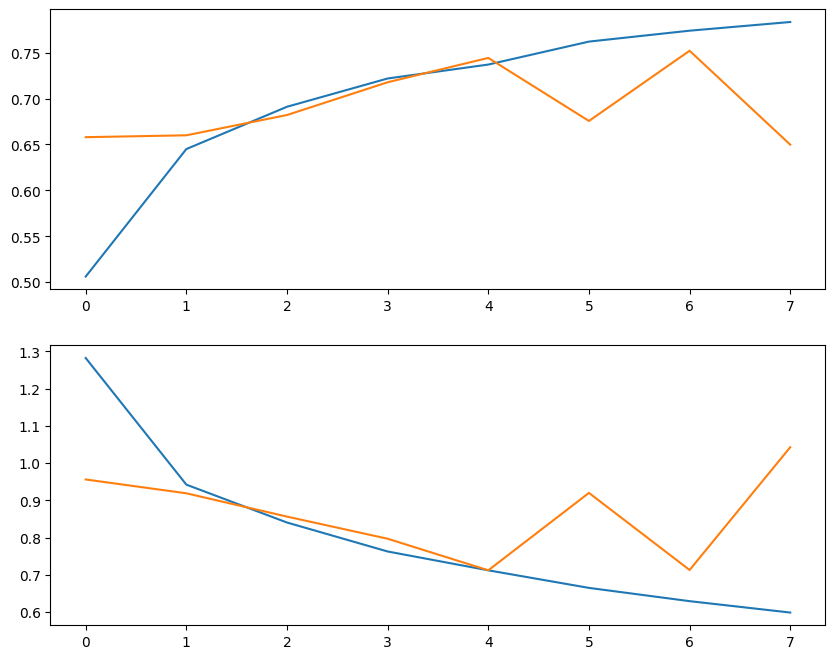

In [25]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

In [26]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0, 
                                  rotation_range = 5,
                                  zoom_range = 0.15)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [29]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

In [30]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 12,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

/tmp/ipykernel_15574/1055435833.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 12,


Epoch 1/12
219/219 [==============================] - 144s 656ms/step - loss: 1.1008 - accuracy: 0.5712 - val_loss: 1.2064 - val_accuracy: 0.5774
Epoch 2/12
219/219 [==============================] - 135s 615ms/step - loss: 0.8914 - accuracy: 0.6686 - val_loss: 0.9349 - val_accuracy: 0.6732
Epoch 3/12
219/219 [==============================] - 135s 614ms/step - loss: 0.8084 - accuracy: 0.7044 - val_loss: 0.7798 - val_accuracy: 0.7259
Epoch 4/12
219/219 [==============================] - 134s 611ms/step - loss: 0.7422 - accuracy: 0.7278 - val_loss: 0.7445 - val_accuracy: 0.7405
Epoch 5/12
219/219 [==============================] - 135s 616ms/step - loss: 0.6995 - accuracy: 0.7465 - val_loss: 0.7213 - val_accuracy: 0.7266
Epoch 6/12
219/219 [==============================] - 138s 627ms/step - loss: 0.6610 - accuracy: 0.7617 - val_loss: 0.7133 - val_accuracy: 0.7514
Epoch 7/12
219/219 [==============================] - 134s 613ms/step - loss: 0.6266 - accuracy: 0.7756 - val_loss: 0.6427 -

<AxesSubplot: >

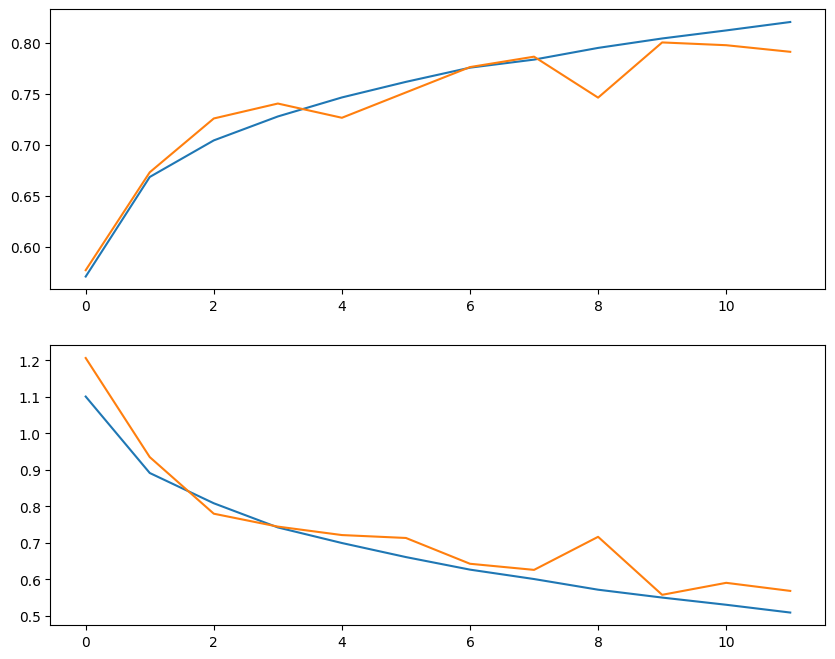

In [31]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

In [8]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0, 
                                  rotation_range = 5,
                                  zoom_range = 0.15)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 12,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

/tmp/ipykernel_17566/1055435833.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 12,


Epoch 1/12
219/219 [==============================] - 284s 1s/step - loss: 1.2169 - accuracy: 0.5175 - val_loss: 1.3582 - val_accuracy: 0.4963
Epoch 2/12
219/219 [==============================] - 165s 752ms/step - loss: 0.9945 - accuracy: 0.6210 - val_loss: 0.9212 - val_accuracy: 0.6634
Epoch 3/12
219/219 [==============================] - 157s 717ms/step - loss: 0.9101 - accuracy: 0.6566 - val_loss: 0.8877 - val_accuracy: 0.6790
Epoch 4/12
219/219 [==============================] - 163s 741ms/step - loss: 0.8457 - accuracy: 0.6836 - val_loss: 0.7717 - val_accuracy: 0.7249
Epoch 5/12
219/219 [==============================] - 160s 728ms/step - loss: 0.7979 - accuracy: 0.7062 - val_loss: 1.1414 - val_accuracy: 0.6155
Epoch 6/12
219/219 [==============================] - 155s 706ms/step - loss: 0.7611 - accuracy: 0.7161 - val_loss: 0.7585 - val_accuracy: 0.7262
Epoch 7/12
219/219 [==============================] - 153s 697ms/step - loss: 0.7219 - accuracy: 0.7362 - val_loss: 0.9820 - va

<AxesSubplot: >

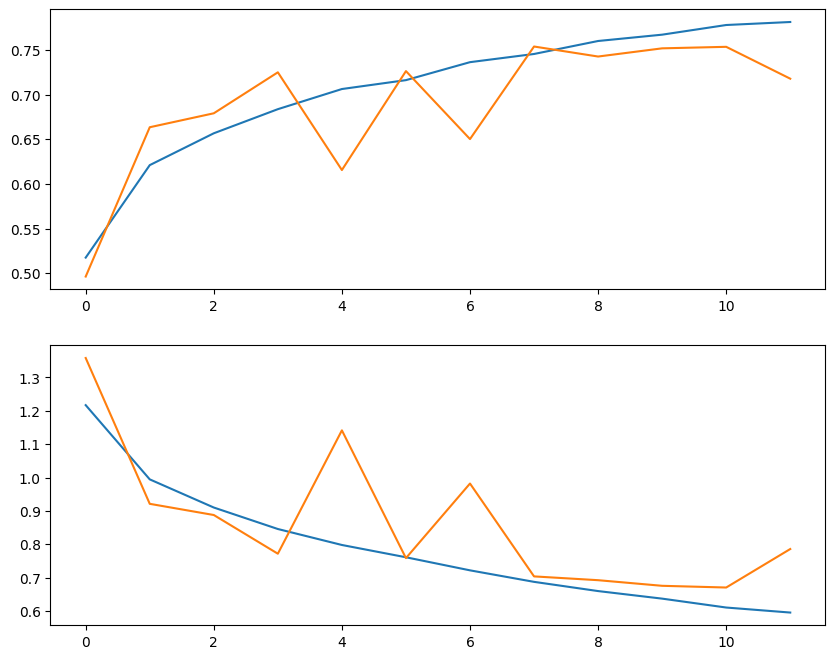

In [10]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

In [11]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0, 
                                  rotation_range = 5,
                                  zoom_range = 0.15)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [12]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

/home/rafael/Python/env/tf_image_classification/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 12,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

/tmp/ipykernel_17566/1055435833.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 12,


Epoch 1/12
219/219 [==============================] - 144s 656ms/step - loss: 1.1932 - accuracy: 0.5456 - val_loss: 1.0193 - val_accuracy: 0.6264
Epoch 2/12
219/219 [==============================] - 145s 661ms/step - loss: 0.9480 - accuracy: 0.6470 - val_loss: 1.0376 - val_accuracy: 0.6376
Epoch 3/12
219/219 [==============================] - 145s 659ms/step - loss: 0.8664 - accuracy: 0.6840 - val_loss: 0.9116 - val_accuracy: 0.6664
Epoch 4/12
219/219 [==============================] - 149s 681ms/step - loss: 0.7971 - accuracy: 0.7062 - val_loss: 0.8806 - val_accuracy: 0.6844
Epoch 5/12
219/219 [==============================] - 149s 680ms/step - loss: 0.7421 - accuracy: 0.7242 - val_loss: 0.8187 - val_accuracy: 0.7075
Epoch 6/12
219/219 [==============================] - 144s 658ms/step - loss: 0.7078 - accuracy: 0.7366 - val_loss: 0.7466 - val_accuracy: 0.7378
Epoch 7/12
219/219 [==============================] - 141s 643ms/step - loss: 0.6683 - accuracy: 0.7558 - val_loss: 0.7592 -

<AxesSubplot: >

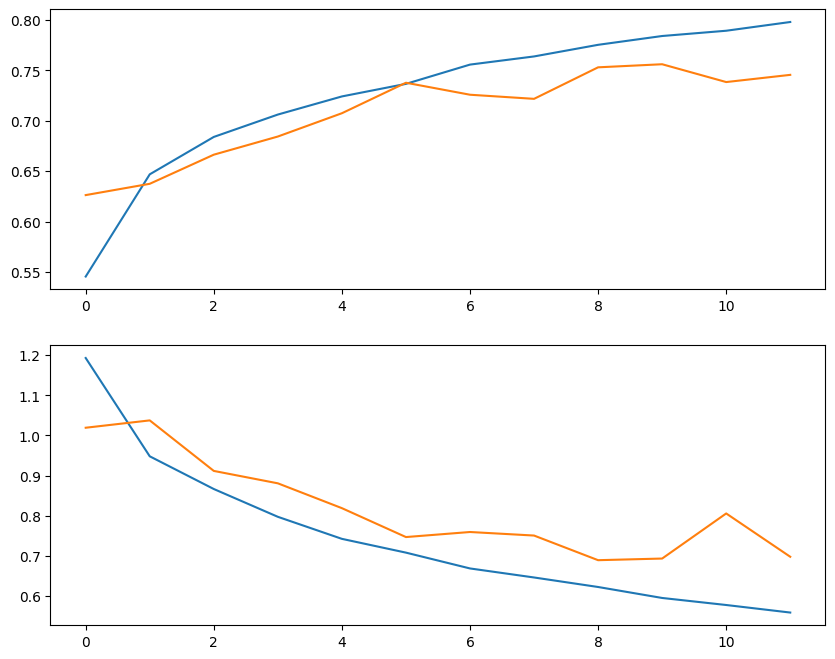

In [14]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

In [24]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [25]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'tanh'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 12,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

Epoch 1/12


/tmp/ipykernel_17566/1055435833.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 12,


219/219 [==============================] - 134s 610ms/step - loss: 1.0640 - accuracy: 0.5917 - val_loss: 0.9127 - val_accuracy: 0.6535
Epoch 2/12
219/219 [==============================] - 130s 594ms/step - loss: 0.7936 - accuracy: 0.7091 - val_loss: 0.7921 - val_accuracy: 0.6994
Epoch 3/12
219/219 [==============================] - 137s 624ms/step - loss: 0.6882 - accuracy: 0.7563 - val_loss: 0.7156 - val_accuracy: 0.7364
Epoch 4/12
219/219 [==============================] - 131s 598ms/step - loss: 0.6181 - accuracy: 0.7799 - val_loss: 0.6874 - val_accuracy: 0.7592
Epoch 5/12
219/219 [==============================] - 132s 600ms/step - loss: 0.5655 - accuracy: 0.8001 - val_loss: 0.5962 - val_accuracy: 0.7935
Epoch 6/12
219/219 [==============================] - 133s 608ms/step - loss: 0.5218 - accuracy: 0.8163 - val_loss: 0.5804 - val_accuracy: 0.7962
Epoch 7/12
219/219 [==============================] - 131s 598ms/step - loss: 0.4857 - accuracy: 0.8340 - val_loss: 0.6537 - val_accura

<AxesSubplot: >

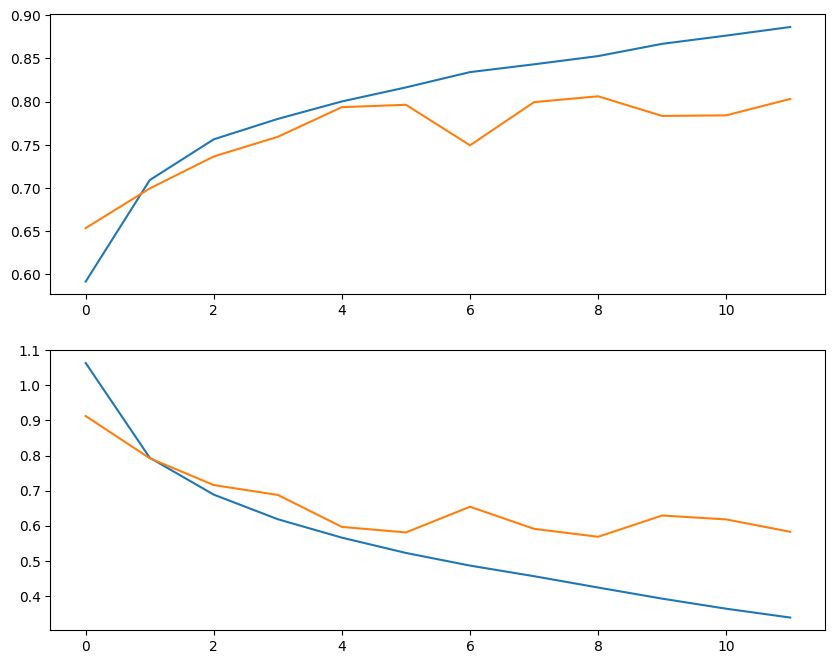

In [27]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

In [28]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [30]:
from tensorflow.keras.optimizers import Adam

In [31]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'tanh'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = Adam(lr = 0.0001))

/home/rafael/Python/env/tf_image_classification/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 12,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

Epoch 1/12


/tmp/ipykernel_17566/1055435833.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 12,


219/219 [==============================] - 114s 516ms/step - loss: 1.0644 - accuracy: 0.5926 - val_loss: 0.9239 - val_accuracy: 0.6464
Epoch 2/12
219/219 [==============================] - 117s 535ms/step - loss: 0.7977 - accuracy: 0.7092 - val_loss: 0.8496 - val_accuracy: 0.6895
Epoch 3/12
219/219 [==============================] - 118s 538ms/step - loss: 0.6840 - accuracy: 0.7563 - val_loss: 0.7251 - val_accuracy: 0.7385
Epoch 4/12
219/219 [==============================] - 131s 599ms/step - loss: 0.6193 - accuracy: 0.7764 - val_loss: 0.6747 - val_accuracy: 0.7571
Epoch 5/12
219/219 [==============================] - 128s 585ms/step - loss: 0.5471 - accuracy: 0.8092 - val_loss: 0.6789 - val_accuracy: 0.7534
Epoch 6/12
  7/219 [..............................] - ETA: 1:49 - loss: 0.5720 - accuracy: 0.8259

KeyboardInterrupt: 

In [13]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [14]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 30,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

Epoch 1/30


/tmp/ipykernel_4144/3302947893.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 30,


219/219 [==============================] - 109s 497ms/step - loss: 1.3039 - accuracy: 0.4967 - val_loss: 1.0799 - val_accuracy: 0.5961
Epoch 2/30
219/219 [==============================] - 107s 489ms/step - loss: 1.0299 - accuracy: 0.6084 - val_loss: 0.9825 - val_accuracy: 0.6318
Epoch 3/30
219/219 [==============================] - 106s 484ms/step - loss: 0.9474 - accuracy: 0.6448 - val_loss: 0.9336 - val_accuracy: 0.6610
Epoch 4/30
219/219 [==============================] - 106s 485ms/step - loss: 0.8898 - accuracy: 0.6719 - val_loss: 0.8618 - val_accuracy: 0.6827
Epoch 5/30
219/219 [==============================] - 106s 484ms/step - loss: 0.8393 - accuracy: 0.6895 - val_loss: 0.8590 - val_accuracy: 0.6912
Epoch 6/30
219/219 [==============================] - 112s 511ms/step - loss: 0.7886 - accuracy: 0.7100 - val_loss: 0.8570 - val_accuracy: 0.6562
Epoch 7/30
219/219 [==============================] - 114s 518ms/step - loss: 0.7447 - accuracy: 0.7257 - val_loss: 0.7451 - val_accura

<AxesSubplot: >

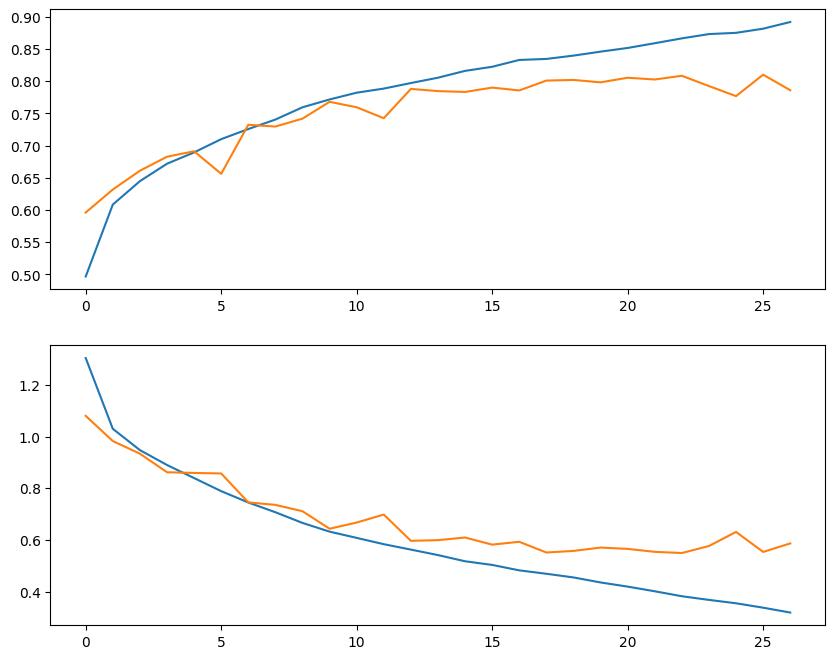

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

In [8]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 64, 
                                                    class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [15]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.1):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 30,
                             steps_per_epoch = 219,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1, 
                             callbacks = [callbacks])

Epoch 1/30


/tmp/ipykernel_66468/3302947893.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 30,


219/219 [==============================] - 127s 573ms/step - loss: 1.7169 - accuracy: 0.2253 - val_loss: 1.5527 - val_accuracy: 0.3509
Epoch 2/30
219/219 [==============================] - 121s 554ms/step - loss: 1.5773 - accuracy: 0.3112 - val_loss: 1.4422 - val_accuracy: 0.4018
Epoch 3/30
219/219 [==============================] - 122s 556ms/step - loss: 1.4843 - accuracy: 0.3465 - val_loss: 1.3673 - val_accuracy: 0.4368
Epoch 4/30
219/219 [==============================] - 121s 551ms/step - loss: 1.4217 - accuracy: 0.3770 - val_loss: 1.2942 - val_accuracy: 0.5265
Epoch 5/30
219/219 [==============================] - 133s 608ms/step - loss: 1.3639 - accuracy: 0.4113 - val_loss: 1.2438 - val_accuracy: 0.5856
Epoch 6/30
219/219 [==============================] - 119s 545ms/step - loss: 1.3104 - accuracy: 0.4384 - val_loss: 1.1547 - val_accuracy: 0.6107
Epoch 7/30
219/219 [==============================] - 120s 546ms/step - loss: 1.2579 - accuracy: 0.4797 - val_loss: 1.0868 - val_accura

<AxesSubplot: >

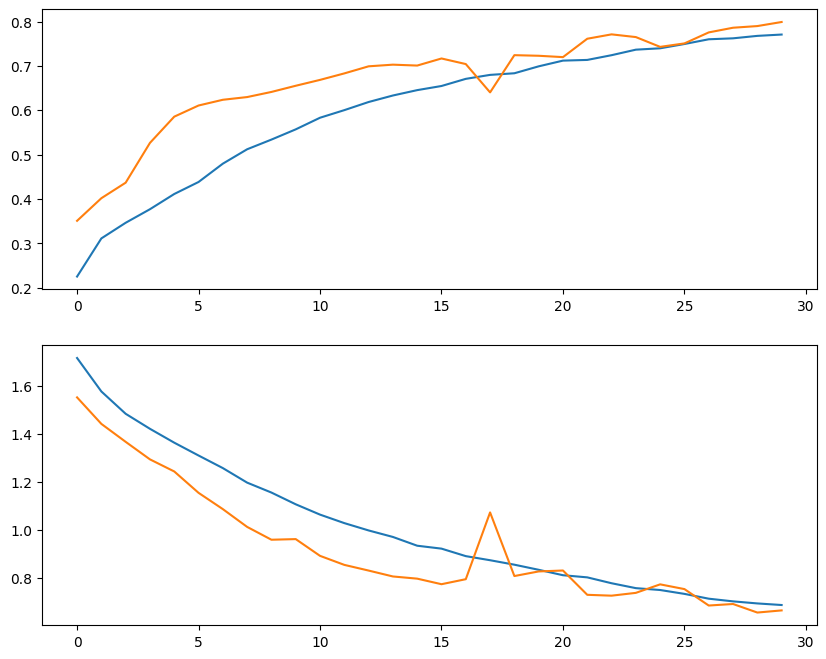

In [17]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])
